In [1]:
from create_percent_diff_summary import invert_dotson_fcn, invert_pig_fcn, invert_thwaites_fcn, eval_models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colorbar as colorbar
import os
import sys
import copy
import pickle
import pandas as pd

2024-11-11 15:28:36.372390: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 15:28:37.957644: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 15:28:38.701927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731338919.452410   16548 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731338919.674541   16548 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 15:28:41.424969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Get the evaluated objects and results for Dotson, PIG, and Thwaites
inv_dotson = invert_dotson_fcn()

Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport
Reading velocity from measures database
C0 is constant: 0.01
Defining friction law
Defining friction law
using englacial temperature for rate factor
Geophysics data imported
Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.208362e+08   1.165900e+04                  1.973342e+04   
  1     7.671563e+07   4.153294e+03   1.973342e+04   4.933356e+04   3         2         0         2         3         
  2     1.371842e+07   6.355098e+02   4.933356e+04   4.933356e+04   4         3         0         2         2         
  3     3.119954e+06   1.450287e+02   4.933356e+04   4.933356e+04   5         4         0         2  

In [3]:
inv_pig = invert_pig_fcn()

Reading outline from icepack database
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport
Reading velocity from measures database
C0 is constant: 0.01
Defining friction law
Defining friction law
using englacial temperature for rate factor
Geophysics data imported
Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     7.123261e+07   3.295358e+03                  3.958842e+04   
  1     9.928873e+06   8.936432e+02   3.958842e+04   3.958842e+04   3         2         0         2         2         
  2     9.288190e+05   5.473094e+01   3.958842e+04   3.958842e+04   4         3         0         2         2         
  3     2.765750e+05   8.696798e+00   3.958842e+04   3.958842e+04   5         4      

In [4]:
inv_thwaites = invert_thwaites_fcn()

Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport
Reading velocity from measures database
C0 is constant: 0.01
Defining friction law
Defining friction law
using englacial temperature for rate factor
Geophysics data imported
Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     3.304588e+08   1.652013e+04                  2.110352e+04   
  1     1.153280e+08   5.714456e+03   2.110352e+04   5.275879e+04   3         2         0         1         3         
  2     2.303631e+07   1.758721e+03   5.275879e+04   1.318970e+05   4         3         0         3         2         
  3     2.303631e+07   1.758721e+03   1.318970e+05   8.243561e+03   5         3         2         2  

In [12]:
import firedrake
print("Cost function Thwaites:", firedrake.assemble(inv_thwaites.loss_functional_nosigma(inv_thwaites.inverse_u)))
print("Cost function PIG:", firedrake.assemble(inv_pig.loss_functional_nosigma(inv_pig.inverse_u)))
print("Cost function Dotson:", firedrake.assemble(inv_dotson.loss_functional_nosigma(inv_dotson.inverse_u)))

Cost function Thwaites: 750.8278979998211
Cost function PIG: 9599.307883868198
Cost function Dotson: 1248.372044290589


In [39]:
select_dataset = 5

In [40]:
%%capture
temp_objects_dotson, summary_list_dotson, columns_list_dotson, u_optimized_list_dotson, loss_function_list_dotson = eval_models(select_dataset, inv_dotson)

In [41]:
%%capture
temp_objects_pig, summary_list_pig, columns_list_pig, u_optimized_list_pig, loss_function_list_pig = eval_models(select_dataset, inv_pig)


In [42]:
%%capture
temp_objects_thwaites, summary_list_thwaites, columns_list_thwaites, u_optimized_list_thwaites, loss_function_list_thwaites = eval_models(select_dataset, inv_thwaites)

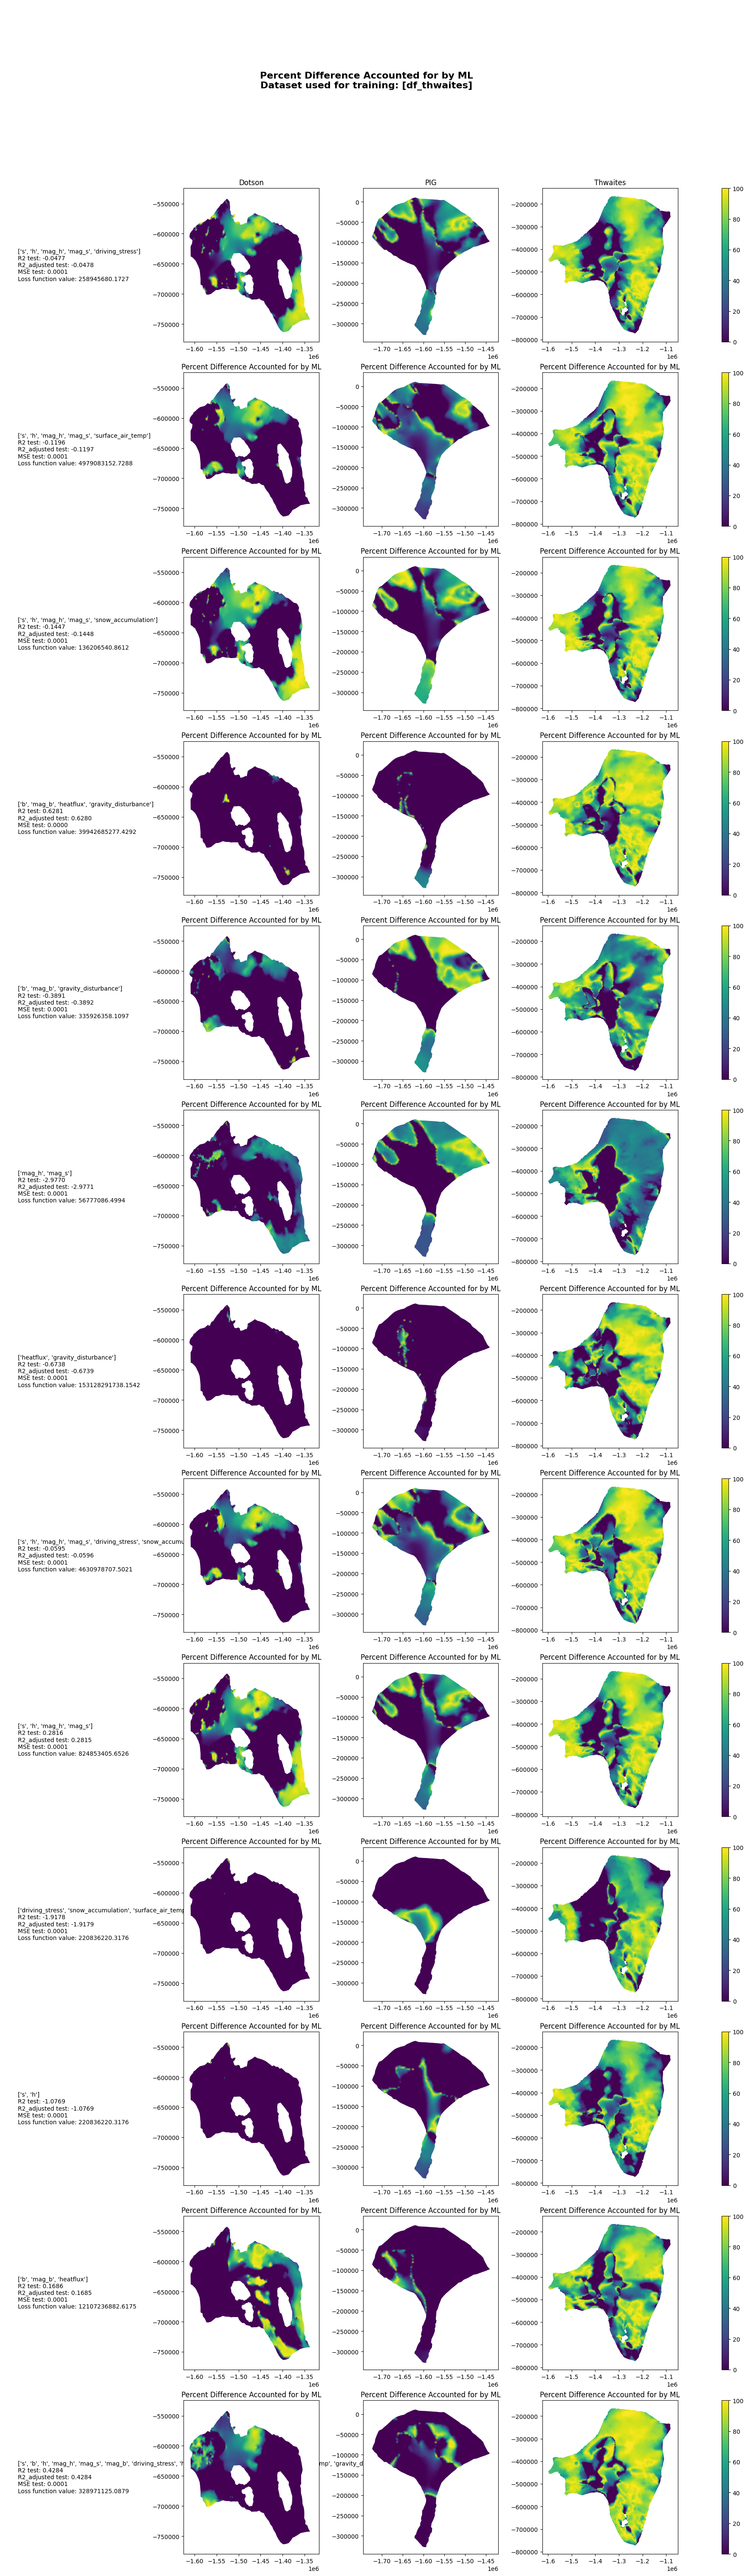

In [43]:
# Determine the dataset used based on select_dataset
if select_dataset == 0:
    dataset_used = "[df_dotson, df_dotson, df_thwaites]"
elif select_dataset == 1:
    dataset_used = "[df_pig, df_pig, df_thwaites]"
elif select_dataset == 2:
    dataset_used = "[df_dotson, df_pig]"
elif select_dataset == 3:
    dataset_used = "[df_dotson]"
elif select_dataset == 4:
    dataset_used = "[df_pig]"
elif select_dataset == 5:
    dataset_used = "[df_thwaites]"

# Since the lists have an equal number of objects, determine the number of rows
n_rows = len(temp_objects_dotson)

# Increase figure size to make the rows larger
fig = plt.figure(figsize=(22, 6 * n_rows))

# Create a gridspec layout with an extra row for the title
# Reduce hspace to decrease vertical gaps between rows
gs = gridspec.GridSpec(n_rows + 1, 5, width_ratios=[4, 4, 4, 4, 0.2], wspace=0.4, hspace=0.2)

# Add a new axes for the title with the dynamic dataset info
ax_title = fig.add_subplot(gs[0, :])
title_text = f"Percent Difference Accounted for by ML\nDataset used for training: {dataset_used}"
ax_title.text(0.5, 0.5, title_text, fontsize=16, weight='bold', ha='center', va='center')
ax_title.axis('off')  # Turn off the axis for the title

# Loop over the objects and plot in the corresponding grid positions
for row in range(n_rows):
    # Summary column (column 0)
    ax_summary = fig.add_subplot(gs[row + 1, 0])
    summary_text = (
        f"{columns_list_dotson[row]}\n"
        f"R2 test: {summary_list_dotson[row]['r2_mean']:.4f}\n"
        f"R2_adjusted test: {summary_list_dotson[row]['r2_adjusted_mean']:.4f}\n"
        f"MSE test: {summary_list_dotson[row]['mse_mean']:.4f}\n"
        f"Loss function value: {loss_function_list_dotson[row]:.4f}"
    )
    ax_summary.text(0.1, 0.5, summary_text, fontsize=10, va="center", ha="left")
    ax_summary.axis('off')  # Turn off the axis for the text column
    
    # Dotson column (column 1)
    ax_dotson = fig.add_subplot(gs[row + 1, 1])
    _, ax_dotson = temp_objects_dotson[row].plot_percent_accounted(vmin=0, vmax = 100, axes=ax_dotson)
    if row == 0:
        ax_dotson.set_title("Dotson")
    
    # PIG column (column 2)
    ax_pig = fig.add_subplot(gs[row + 1, 2])
    _, ax_pig = temp_objects_pig[row].plot_percent_accounted(vmin=0, vmax = 100,  axes=ax_pig)
    if row == 0:
        ax_pig.set_title("PIG")
    
    # Thwaites column (column 3)
    ax_thwaites = fig.add_subplot(gs[row + 1, 3])
    _, ax_thwaites = temp_objects_thwaites[row].plot_percent_accounted(vmin=0, vmax = 100, axes=ax_thwaites)
    if row == 0:
        ax_thwaites.set_title("Thwaites")

    # Create a color bar at the end of the row (column 4)
    cax = fig.add_subplot(gs[row + 1, 4])
    fig.colorbar(ax_dotson.collections[0], cax=cax)

# Show the final figure
plt.show()
